# Xấp xỉ số PI dùng Monte Carlo

In [1]:
# Số điểm được tạo ra
n <- 100000

# Tạo ngẫu nhiên n điểm trong hình vuông có cạnh là 1
x <- runif(n)
y <- runif(n)

# Tính khoảng cách từ mỗi điểm tới tâm (0.5, 0.5)
d <- sqrt((x - 0.5)^2 + (y - 0.5)^2)

# Số điểm nằm trong đường tròn bán kính 0.5 tại tâm (0.5, 0.5)
points_inside <- sum(d <= 0.5)

# Tỉ lệ số điểm trong đường tròn với tổng số điểm
pi_approx <- 4 * points_inside / n

# In kết quả
cat("Approximated Pi:", pi_approx, "\n")

Approximated Pi: 3.1378 


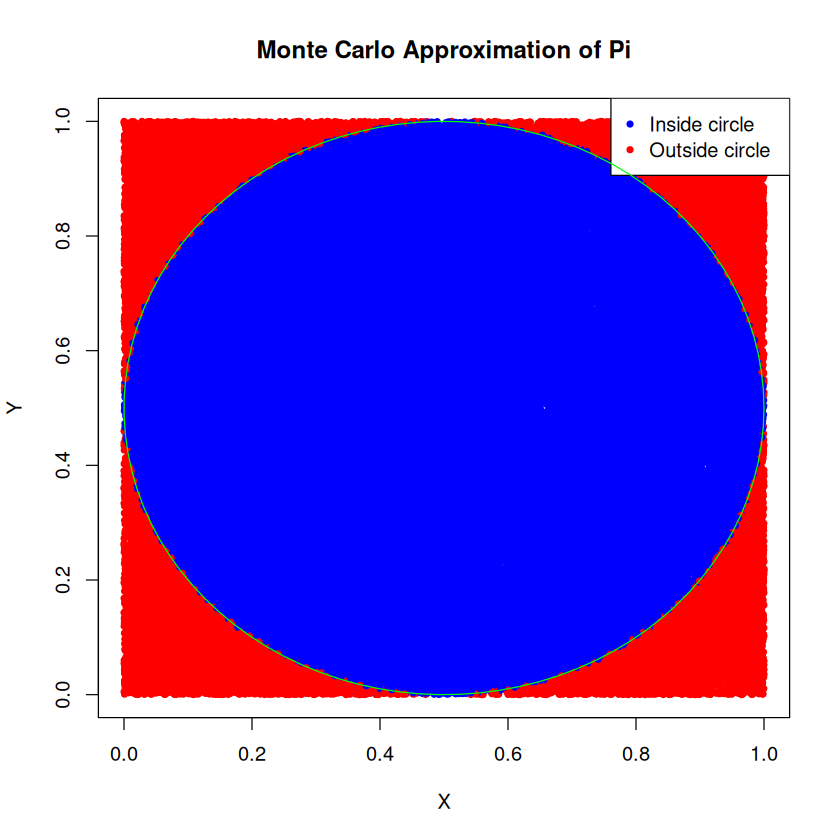

In [2]:
# Vẽ hình minh họa
plot(x, y, col = ifelse(d <= 0.5, "blue", "red"), pch = 20, 
     main = "Monte Carlo Approximation of Pi",
     xlab = "X", ylab = "Y")
legend("topright", legend = c("Inside circle", "Outside circle"), 
       col = c("blue", "red"), pch = 20)
circle <- function(center, r, n=100){
  tt <- seq(0,2*pi,length=n)
  xx <- center[1] + r*cos(tt)
  yy <- center[2] + r*sin(tt)
  lines(xx, yy, col="green")
}
circle(c(0.5, 0.5), 0.5, 100)

# Xấp xỉ số e

Approximated e: 0.6334 


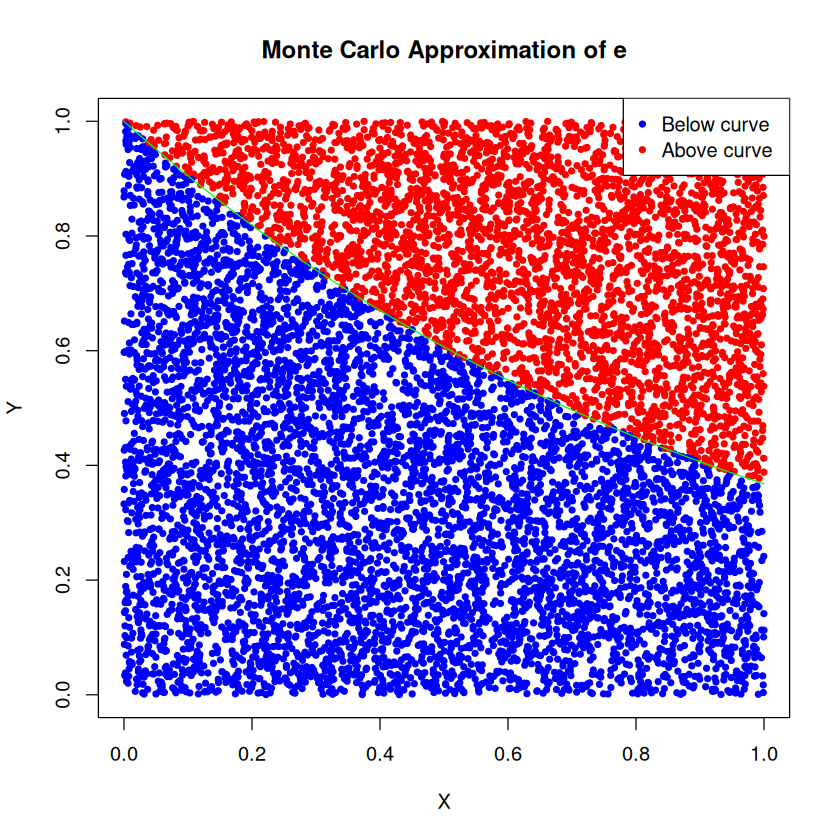

In [3]:
# Số điểm được tạo ra
n <- 10000

# Tạo ngẫu nhiên n điểm trong hình vuông có cạnh là 1
x <- runif(n)
y <- runif(n)

# Tính khoảng cách từ mỗi điểm tới tâm (0, 0)
d <- sqrt(x^2 + y^2)

# Số điểm nằm trong hình vuông có cạnh là 1 và nằm dưới đường cong y = e^(-x)
points_inside <- sum(y <= exp(-x))

# Tỉ lệ số điểm nằm dưới đường cong y = e^(-x) với tổng số điểm
e_approx <- points_inside / n

# In kết quả
cat("Approximated e:", e_approx, "\n")

# Vẽ hình minh họa
plot(x, y, col = ifelse(y <= exp(-x), "blue", "red"), pch = 20, 
     main = "Monte Carlo Approximation of e",
     xlab = "X", ylab = "Y")
legend("topright", legend = c("Below curve", "Above curve"), 
       col = c("blue", "red"), pch = 20)

curve(exp(-x), from = 0, to = 1, add = TRUE, col = "green")

# Markov Chain 

# MCMC 

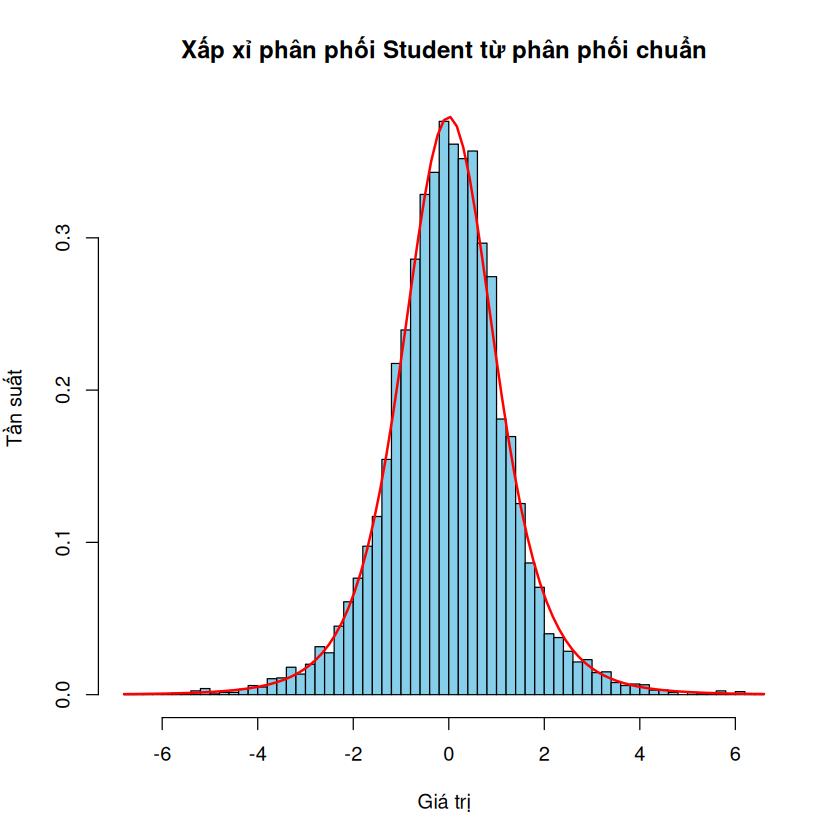

In [4]:
# Hàm mật độ xác suất của phân phối Student
student_density <- function(x, nu) {
  gamma((nu + 1)/2) / (sqrt(pi * nu) * gamma(nu/2)) * (1 + x^2/nu)^(-(nu + 1)/2)
}

# Hàm log của hàm mật độ xác suất của phân phối Student
log_student_density <- function(x, nu) {
  log(gamma((nu + 1)/2)) - log(sqrt(pi * nu)) - log(gamma(nu/2)) - ((nu + 1)/2) * log(1 + x^2/nu)
}

# Thuật toán Metropolis-Hastings
metropolis_hastings <- function(initial_value, num_iterations, target_density, proposal_sd, nu) {
  current_state <- initial_value
  samples <- numeric(num_iterations)
  for (i in 1:num_iterations) {
    # Đề xuất một mẫu mới từ phân phối Gaussian
    proposed_state <- rnorm(1, mean = current_state, sd = proposal_sd)
    # Tính tỉ lệ chấp nhận
    acceptance_ratio <- exp(target_density(proposed_state, nu) - target_density(current_state, nu))
    # Chấp nhận hoặc từ chối mẫu mới
    if (runif(1) < acceptance_ratio) {
      current_state <- proposed_state
    }
    # Lưu mẫu
    samples[i] <- current_state
  }
  return(samples)
}

# Thiết lập tham số
initial_value <- 0  # Giá trị khởi tạo
num_iterations <- 10000  # Số lượng mẫu
proposal_sd <- 1  # Độ lệch chuẩn của phân phối Gaussian đề xuất
nu <- 5  # Bậc của phân phối Student

# Chạy thuật toán Metropolis-Hastings
samples <- metropolis_hastings(initial_value, num_iterations, log_student_density, proposal_sd, nu)

# Vẽ histogram của các mẫu
hist(samples, breaks = 50, freq = FALSE, main = "Xấp xỉ phân phối Student từ phân phối chuẩn",
     xlab = "Giá trị", ylab = "Tần suất", col = "skyblue")
curve(student_density(x, nu), add = TRUE, col = "red", lwd = 2)